<div style="font-family: Arial, sans-serif; font-size: 69px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px; text-align: center;">Table of Content </div>

# Table of Contents
1. [📊 Understand the Data](#understand-the-data)
2. [🧹 Data Cleaning](#data-cleaning)
   1. [Best Practice](#best-practice)
   2. [Snake Case](#snake)
   3. [Delete Unnecessary Columns](#31)
   4. [Rename](#32)
   5. [Categorize ](#33)
   6. [Classify ](#34)
   7. [Count](#35)
   8. [Extract](#36)
   9. [Simplify](#37)
   10. [Format](#38)
   11. [Extract more ](#39)
   12. [Classify more](#310)
3. [📈 Conclusion](#conclusion)


<a id="understand-the-data"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Chapter One</span>
            <span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Understand the Data 📊
            </span>
        </b>
    </h1>
    <br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


In [1]:
import numpy as np  
import pandas as pd
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\Phone Data Analysis\Phone_dataset.csv'
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(7)

,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,...,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
1430,apple,Apple iPhone 15,Amazon US,716.99,USD,716.99,512,6,2023-09-22,147.6 x 71.6 x 7.8 mm (5.81 x 2.82 x 0.31 in),...,Apple A16 Bionic (4 nm),Hexa-core (2x3.46 GHz Everest + 4x2.02 GHz Saw...,Apple GPU (5-core graphics),2023,0,461,118.913,330.675,999.990,medium price
427,xiaomi,Xiaomi Mi 10T Pro 5G,Amazon UK,247.03,GBP,321.39,256,8,2020-10-13,165.1 x 76.4 x 9.3 mm (6.5 x 3.01 x 0.37 in),...,Qualcomm SM8250 Snapdragon 865 5G (7 nm+),Octa-core (1x2.84 GHz Cortex-A77 & 3x2.42 GHz ...,Adreno 650,2020,0,395,101.096,197.460,493.332,medium price
573,motorola,Motorola Edge 20,Amazon US,375.00,USD,375.00,256,8,2021-08-16,163 x 76 x 7 mm (6.42 x 2.99 x 0.28 in),...,Qualcomm SM7325 Snapdragon 778G 5G (6 nm),Octa-core (1x2.4 GHz Cortex-A78 & 3x2.2 GHz Co...,Adreno 642L,2021,0,385,127.500,249.990,584.150,medium price
1329,motorola,Motorola Moto G13,Amazon DE,113.99,EUR,123.52,128,4,2023-01-24,162.7 x 74.7 x 8.2 mm (6.41 x 2.94 x 0.32 in),...,Mediatek MT6769Z Helio G85 (12 nm),Octa-core (2x2.0 GHz Cortex-A75 & 6x1.8 GHz Co...,Mali-G52 MC2,2023,0,270,118.913,330.675,999.990,medium price
935,samsung,Samsung Galaxy A53 5G,Amazon DE,295.37,EUR,320.06,128,6,2022-03-24,159.6 x 74.8 x 8.1 mm (6.28 x 2.94 x 0.32 in),...,Exynos 1280 (5 nm),Octa-core (2x2.4 GHz Cortex-A78 & 6x2.0 GHz Co...,Mali-G68,2022,0,405,114.990,247.180,793.200,medium price
1155,apple,Apple iPhone 14 Pro Max,Amazon UK,679.73,GBP,884.33,512,6,2022-09-16,160.7 x 77.6 x 7.9 mm (6.33 x 3.06 x 0.31 in),...,Apple A16 Bionic (4 nm),Hexa-core (2x3.46 GHz Everest + 4x2.02 GHz Saw...,Apple GPU (5-core graphics),2022,0,460,114.990,247.180,793.200,high price
903,oneplus,OnePlus 10T,Amazon DE,629.99,EUR,682.66,256,16,2022-08-06,163 x 75.4 x 8.8 mm (6.42 x 2.97 x 0.35 in),...,Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm),Octa-core (1x3.19 GHz Cortex-X2 & 3x2.75 GHz C...,Adreno 730,2022,0,394,114.990,247.180,793.200,medium price


In [3]:
print("The size of the DataFrame:",df.size, '\n')
print('The Shape of the DataFrame', df.shape, '\n')
print("Available columns in the DataFrame:", df.columns)

# Calculate memory usage of the DataFrame
memory_size = df.memory_usage(deep=True).sum()
memory_size_mb = memory_size / (1024 ** 2)
print(f"\nEstimated memory size: {memory_size_mb:.2f} MB")


The size of the DataFrame: 53165 

The Shape of the DataFrame (1715, 31) 

Available columns in the DataFrame: Index(['phone_brand', 'phone_model', 'store', 'price', 'currency', 'price_USD',
       'storage', 'ram', 'Launch', 'Dimensions', 'Weight', 'Display_Type',
       'Display_Size', 'Display_Resolution', 'OS', 'NFC', 'USB', 'BATTERY',
       'Features_Sensors', 'Colors', 'Video', 'Chipset', 'CPU', 'GPU', 'Year',
       'Foldable', 'PPI_Density', 'quantile_10', 'quantile_50', 'quantile_90',
       'price_range'],
      dtype='object')

Estimated memory size: 2.34 MB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
phone_brand,1715,22,samsung,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone_model,1715,472,Apple iPhone 15 Pro,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,1715,8,Amazon DE,585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1715.0,NaN,NaN,NaN,381.33856,334.142684,49.0,149.74,249.99,499.475,2179.46
currency,1715,3,USD,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_USD,1715.0,NaN,NaN,NaN,420.052589,361.986094,52.63,167.89,279.0,551.145,2361.66
storage,1715.0,NaN,NaN,NaN,271.286297,207.263335,32.0,128.0,256.0,256.0,1000.0
ram,1715.0,NaN,NaN,NaN,7.973178,3.422996,2.0,6.0,8.0,12.0,24.0
Launch,1715,337,2023-09-22,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dimensions,1715,397,164.2 x 76.1 x 8.1 mm (6.46 x 3.00 x 0.32 in),27,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<a id="data-cleaning"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Chapter Two</span>
            <span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Data Cleaning 🧹
            </span>
        </b>
    </h1>
    <br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

phone_brand           0
phone_model           0
store                 0
price                 0
currency              0
price_USD             0
storage               0
ram                   0
Launch                0
Dimensions            0
Weight                3
Display_Type          0
Display_Size          0
Display_Resolution    0
OS                    0
NFC                   0
USB                   0
BATTERY               0
Features_Sensors      0
Colors                0
Video                 0
Chipset               0
CPU                   0
GPU                   0
Year                  0
Foldable              0
PPI_Density           0
quantile_10           0
quantile_50           0
quantile_90           0
price_range           0
dtype: int64

<Axes: >

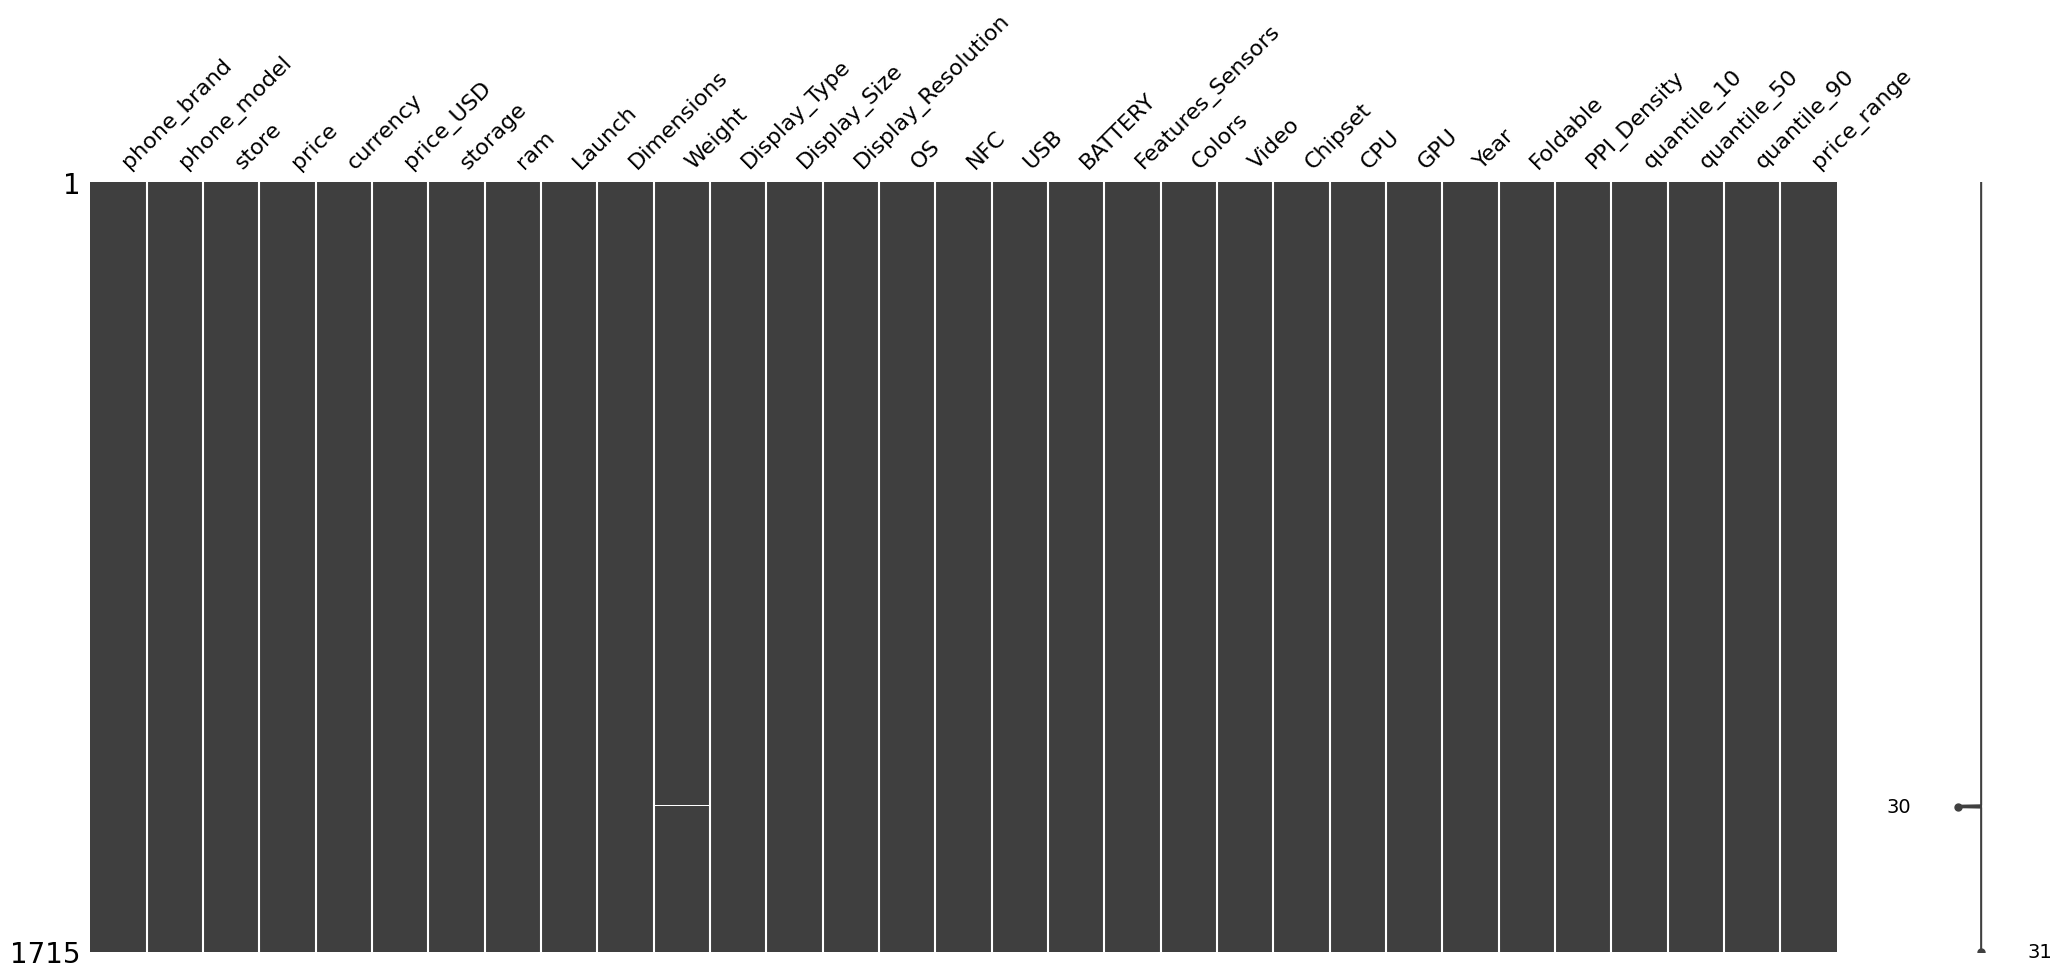

In [8]:
msno.matrix(df)

<a id="best-practice"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
<p style="color: Black;">
   ⭐ <b>Best Practice before clean the data have a copy of Original Data<b>
   <pre  style="color: Black; font-size: 20px;">
   1.Rename all column make one format 
   </pre>
</p>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>

In [9]:
dfc = df.copy()

<a id="snake"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ Make all column in snake case
</b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [10]:
dfc.columns

Index(['phone_brand', 'phone_model', 'store', 'price', 'currency', 'price_USD',
       'storage', 'ram', 'Launch', 'Dimensions', 'Weight', 'Display_Type',
       'Display_Size', 'Display_Resolution', 'OS', 'NFC', 'USB', 'BATTERY',
       'Features_Sensors', 'Colors', 'Video', 'Chipset', 'CPU', 'GPU', 'Year',
       'Foldable', 'PPI_Density', 'quantile_10', 'quantile_50', 'quantile_90',
       'price_range'],
      dtype='object')

In [11]:
# Dictionary for renaming columns to lowercase
column_rename_dict = {
    'price_USD': 'price_usd',
    'Launch': 'launch',
    'Dimensions': 'dimensions',
    'Weight': 'weight',
    'Display_Type': 'display_type',
    'Display_Size': 'display_size',
    'Display_Resolution': 'display_resolution',
    'OS': 'os',
    'NFC': 'nfc',
    'USB': 'usb',
    'BATTERY': 'battery',
    'Features_Sensors': 'features_sensors',
    'Colors': 'colors',
    'Video': 'video',
    'Chipset': 'chipset',
    'CPU': 'cpu',
    'GPU': 'gpu',
    'Year': 'year',
    'Foldable': 'foldable',
    'PPI_Density': 'ppi_density',
}

# Renaming the columns in the dataframe
dfc.rename(columns=column_rename_dict, inplace=True)


<a id="31"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 1. **Delete Unnecessary Columns**: Remove the 'price' and 'currency' columns if the 'price($)' column is available.
</b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [12]:
dfc.shape

(1715, 31)

In [13]:
dfc.drop(columns=['currency', 'price'], inplace=True )

In [14]:
dfc.shape

(1715, 29)

<a id="32"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 2. **Handle Missing Values for Weight**: Fill any missing values in the 'weight' column with the mean weight.</b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [15]:
dfc['weight'].isna().sum()

3

In [16]:
wt_mean = dfc['weight'].mean()

In [17]:
dfc['weight'].fillna(dfc['weight'].mean(), inplace=True)

In [18]:
dfc['weight'].isna().sum()

0

<a id="33"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 3. **Rename and Format Launch Date**: Convert the 'launch' column to a datetime format and rename it to 'launching_date'.</b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [19]:
dfc[['launch']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   launch  1715 non-null   object
dtypes: object(1)
memory usage: 13.5+ KB


In [20]:
dfc['launch'] = pd.to_datetime(dfc['launch'])


In [21]:
print(dfc['launch'].dtype)


datetime64[ns]


In [22]:
dfc.rename(columns={'launch':'launch_date'}, inplace=True)

In [23]:
dfc.columns

Index(['phone_brand', 'phone_model', 'store', 'price_usd', 'storage', 'ram',
       'launch_date', 'dimensions', 'weight', 'display_type', 'display_size',
       'display_resolution', 'os', 'nfc', 'usb', 'battery', 'features_sensors',
       'colors', 'video', 'chipset', 'cpu', 'gpu', 'year', 'foldable',
       'ppi_density', 'quantile_10', 'quantile_50', 'quantile_90',
       'price_range'],
      dtype='object')

<a id="34"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡4. Categorize OS </b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


In [24]:
dfc['os']

0                                                  iOS 18
1                                                  iOS 18
2                                                  iOS 18
3                                                  iOS 18
4                                                  iOS 18
                              ...                        
1710    Android 13, up to 3 major Android upgrades, Hy...
1711    Android 13, up to 3 major Android upgrades, Hy...
1712    Android 13, up to 3 major Android upgrades, Hy...
1713                                  Android 13, MIUI 14
1714                         Android 13, MIUI 14 for POCO
Name: os, Length: 1715, dtype: object

In [25]:
# Adjusted regex to capture versions with possible decimals
dfc[['os_type', 'os_version']] = dfc['os'].str.extract(r'(iOS|Android|EMUI|HarmonyOS)\s([\d.]+)')

In [26]:
dfc['os_type'].isna().sum()

0

In [27]:
dfc[dfc['os_type'].isna()]['os']

Series([], Name: os, dtype: object)

In [28]:
# Display 
dfc[['os', 'os_type', 'os_version']].sample(8)

,os,os_type,os_version
1277,"Android 11, XOS 10",Android,11
79,"Android 14, up to 4 major Android upgrades, Hy...",Android,14
638,"Android 11, upgradable to Android 13, HyperOS",Android,11
1581,"iOS 17, upgradable to iOS 18",iOS,17
45,"Android 14, up to 3 major Android upgrades, Ox...",Android,14
1076,"Android 12, up to 4 major Android upgrades, On...",Android,12
765,"Android 8.0 (Oreo), upgradable to Android 10, ...",Android,8.0
1552,"Android 13, upgradable to Android 14, HyperOS",Android,13


<a id="35"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 5. **Classify Battery Size**: Create categories for 'battery size' (e.g., small, mid, large) based on size ranges and delete the original 'battery' column.</b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [29]:
dfc['battery'].unique()

array([ 3582,  4685,  3561,  4674,  5500,  4650,  4700,  5060,  4492,
        5600,  5200,  5150,  5000,  5050,  4310,  4000,  4200,  4500,
        6000,  4900,  4400,  5010,  5030,  5160,  5100,  6500, 10200,
        4780,  2227,  3687,  1821,  2815,  4115,  4510,  4300,  5260,
        5020,  4230,  2438,  4352,  3240,  3095,  4614,  5003,  4360,
        4470,  4630,  4800,  3300,  4100,  4600,  4520,  4250,  2942,
        3174,  2658,  3500,  3000,  2716,  3110,  3046,  3969,  3700,
        2800,  3650,  3800,  3100,  3400,  3279,  4323,  3200,  2018,
        4355,  4020,  4610,  5080,  4820,  3349,  4441,  4383,  3274,
        4380,  4575,  4821,  5330,  4815,  5400,  3900, 10090,  8000],
      dtype=int64)

In [30]:
def battery_size_category(b):
    if b < 3500:
        return 'Small'
    elif 3500 <= b < 4500:
        return 'Medium'
    elif 4500 <= b < 5500:
        return 'Large'
    elif 5500 <= b < 6000:
        return 'Extra Large'
    else:
        return 'Super Large'

In [31]:
dfc['battery_size'] = dfc['battery'].apply(battery_size_category)

In [32]:
dfc['battery_size'].sample(5)

886     Medium
943     Medium
87       Large
234      Large
1667     Large
Name: battery_size, dtype: object

<a id="36"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 6. **Count Available Colors**: Count how many colors are available in the 'color_available' column by using the commas as a delimiter.
 </b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [33]:
dfc['colors']

0       Black Titanium, White Titanium, Natural Titani...
1       Black Titanium, White Titanium, Natural Titani...
2       Black Titanium, White Titanium, Natural Titani...
3       Black Titanium, White Titanium, Natural Titani...
4                   Black, White, Pink, Teal, Ultramarine
                              ...                        
1710    Midnight Black, Aurora Purple (Coral Purple), ...
1711    Midnight Black, Aurora Purple (Coral Purple), ...
1712    Midnight Black (Fushion Black), Moonlight Whit...
1713    Midnight Black, Navy Blue, Glacier White, Clov...
1714                                  Black, Blue, Purple
Name: colors, Length: 1715, dtype: object

In [34]:
dfc['colors_available'] = dfc['colors'].str.split(',').apply(lambda x: len(x))

In [35]:
dfc[['colors_available', 'colors']]

,colors_available,colors
0,4,"Black Titanium, White Titanium, Natural Titani..."
1,4,"Black Titanium, White Titanium, Natural Titani..."
2,4,"Black Titanium, White Titanium, Natural Titani..."
3,4,"Black Titanium, White Titanium, Natural Titani..."
4,5,"Black, White, Pink, Teal, Ultramarine"
...,...,...
1710,6,"Midnight Black, Aurora Purple (Coral Purple), ..."
1711,6,"Midnight Black, Aurora Purple (Coral Purple), ..."
1712,5,"Midnight Black (Fushion Black), Moonlight Whit..."
1713,4,"Midnight Black, Navy Blue, Glacier White, Clov..."


<a id="37"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 7. **Extract Chip Company Name and Delete Chipset Column**: Identify the chip company from the 'chipset' column and then delete the original 'chipset' column.</b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [36]:
dfc['chipset']

0                                Apple A18 Pro (3 nm)
1                                Apple A18 Pro (3 nm)
2                                Apple A18 Pro (3 nm)
3                                Apple A18 Pro (3 nm)
4                                    Apple A18 (3 nm)
                            ...                      
1710    Qualcomm SM7435-AB Snapdragon 7s Gen 2 (4 nm)
1711    Qualcomm SM7435-AB Snapdragon 7s Gen 2 (4 nm)
1712             Mediatek Dimensity 7200 Ultra (4 nm)
1713               Mediatek MT6769Z Helio G85 (12 nm)
1714               Mediatek MT6769Z Helio G85 (12 nm)
Name: chipset, Length: 1715, dtype: object

In [37]:
dfc['chip_company'] = dfc['chipset'].str.extract(r'(Apple|Qualcomn|Mediatek|Qualcomm|Google|Kirin|Unisoc|Exynos|JLQ|MediaTek)')

In [38]:
dfc['chip_company'].isna().sum()

2

In [39]:
dfc[dfc['chip_company'].isna()][['chipset', 'chip_company']]


,chipset,chip_company
454,8,NaN
571,8,NaN


<a id="38"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 8. **Classify CPU Cores**: Detect the number of cores in the 'CPU' column (e.g., octa, hexa, nona) and replace '8 core' with 'octa core'.
</b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [40]:
dfc['cpu']

0                     Hexa-core (2x4.05 GHz + 4x2.42 GHz)
1                     Hexa-core (2x4.05 GHz + 4x2.42 GHz)
2                     Hexa-core (2x4.05 GHz + 4x2.42 GHz)
3                     Hexa-core (2x4.05 GHz + 4x2.42 GHz)
4                     Hexa-core (2x4.04 GHz + 4x2.20 GHz)
                              ...                        
1710    Octa-core (4x2.40 GHz Cortex-A78 & 4x1.95 GHz ...
1711    Octa-core (4x2.40 GHz Cortex-A78 & 4x1.95 GHz ...
1712    Octa-core (2x2.8 GHz Cortex-A715 & 6x2.0 GHz C...
1713    Octa-core (2x2.0 GHz Cortex-A75 & 6x1.8 GHz Co...
1714    Octa-core (2x2.0 GHz Cortex-A75 & 6x1.8 GHz Co...
Name: cpu, Length: 1715, dtype: object

In [41]:
dfc['cpu_core'] = dfc['cpu'].str.extract(r'(Hexa-core|Octa-core|Nona-core|8-core|)')

In [42]:
dfc['cpu_core'].isnull().sum()

0

In [43]:
dfc[dfc['cpu_core'].isnull()]['cpu']

Series([], Name: cpu, dtype: object)

<a id="39"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡9.  **Simplify GPU Information**: Extract only the first word from the 'GPU' column, categorize it, and delete the original 'GPU' column.</b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [44]:
dfc['gpu']

0       Apple GPU (6-core graphics)
1       Apple GPU (6-core graphics)
2       Apple GPU (6-core graphics)
3       Apple GPU (6-core graphics)
4       Apple GPU (5-core graphics)
                   ...             
1710                     Adreno 710
1711                     Adreno 710
1712                  Mali-G610 MC4
1713                   Mali-G52 MC2
1714                   Mali-G52 MC2
Name: gpu, Length: 1715, dtype: object

In [45]:
dfc['gpu_company'] = dfc['gpu'].str.extract(r'(Apple|Adreno|Mali|PowerVR|Immortalis|)')

In [46]:
dfc['gpu_company'].isnull().sum()

0

In [47]:
dfc[dfc['gpu_company'].isnull()]['gpu']

Series([], Name: gpu, dtype: object)

<a id="310"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 10.  **Format Year as DateTime**: Convert the 'year' column to a datetime format. </b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [48]:
print(dfc['year'].dtype)

int64


In [49]:
dfc['year'] = pd.to_datetime(dfc['year'], format='%Y')

In [50]:
print(dfc['year'].dtype)

datetime64[ns]


<a id="311"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 11.  **Extract Fingerprint Sensor Location**: From the 'features_sensors' column, identify whether 'fingerprint' is mentioned, including its location (e.g., side, under), and rename the column to 'fingerprint_location'.
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [51]:
dfc['features_sensors'].unique()

array(['Face ID, accelerometer, gyro, proximity, compass, barometer',
       'Fingerprint (under display, optical), accelerometer, gyro, proximity, compass',
       'Fingerprint (side-mounted), accelerometer, gyro, proximity, compass, barometer',
       'Fingerprint (under display, ultrasonic), accelerometer, gyro, proximity, compass, barometer',
       'Fingerprint (under display, ultrasonic), accelerometer, gyro, proximity, compass, barometer, thermometer (skin temperature)',
       'Fingerprint (under display, optical), accelerometer, gyro, proximity, compass, barometer',
       'Fingerprint (under display, optical), Face ID, accelerometer, gyro, proximity, compass, color spectrum',
       'Fingerprint (under display, optical), accelerometer, gyro, compass, ultrasound proximity',
       'Fingerprint (side-mounted), accelerometer, compass',
       'Fingerprint (under display, optical), accelerometer, proximity, gyro, compass, color spectrum',
       'Fingerprint (side-mounted), accel

In [52]:
dfc['fingerprint'] = dfc['features_sensors'].str.extract(r'(side|front|under|rear|Face|Accelerometer)')

In [53]:
dfc['fingerprint'].isnull().sum()

0

In [54]:
dfc[dfc['fingerprint'].isnull()]['features_sensors']

Series([], Name: features_sensors, dtype: object)

<a id="312"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 12 **Classify Video Quality**: Extract the video quality from the 'video' column (e.g., 8K, 4K, 1080p) after the '@' symbol and rename the column to 'video_quality'.</b> </b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>


In [55]:
dfc['video'].unique()

array(['4K@24/25/30/60/100/120fps, 1080p@25/30/60/120/240fps, 10-bit HDR, Dolby Vision HDR (up to 60fps), ProRes, 3D (spatial) video/audio, stereo sound rec.',
       '4K@24/25/30/60fps, 1080p@25/30/60/120/240fps, HDR, Dolby Vision HDR (up to 60fps), stereo sound rec.',
       '8K@24fps, 4K@30/60fps, 1080p@30/60/120/240fps, 720p@480fps; gyro-EIS, HDR10+',
       '4K@24/30/60fps, 1080p@24/30/60/120/240fps, 10-bit HDR, gyro-EIS, OIS',
       '4K@24/30/60fps, 1080p@24/30/60/120/240fps; gyro-EIS, OIS, 10-bit HDR',
       '8K@30fps, 4K@24/30/60fps, 1080p@24/30/60/120/240fps; gyro-EIS, OIS, 10-bit HDR',
       '4K@30/60fps, 1080p@30/60/120/240fps, OIS',
       '4K@24/30/60fps, 1080p@30/60/120/240fps, gyro-EIS, OIS, HDR, 10-bit video',
       '4K@30fps, 1080p@30/60fps, gyro-EIS, OIS',
       '4K@30/60fps (10-bit), 1080p@30/60fps, gyro-EIS, OIS',
       '1080p@30fps', '4K, 1080p, HDR, gyro-EIS, OIS',
       '4K@30fps, 1080p@30fps', '1080p@30/60fps',
       '4K@30fps, 1080p@30/60/120/240fps, gy

In [56]:
dfc['video_resolution'] = dfc['video'].str.extract(r'(\b(?:4K|8K|1080p)\b)')


In [57]:
dfc['video_resolution'].isnull().sum()

5

<a id="conclusion"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Last but not least, the final chapter</span>
            <br><span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Draw an Conclusion 📝
            </span>
        </b>
    </h1>
<br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


In [58]:
dfc.dropna(inplace=True)

In [59]:
df.shape

(1715, 31)

<Axes: >

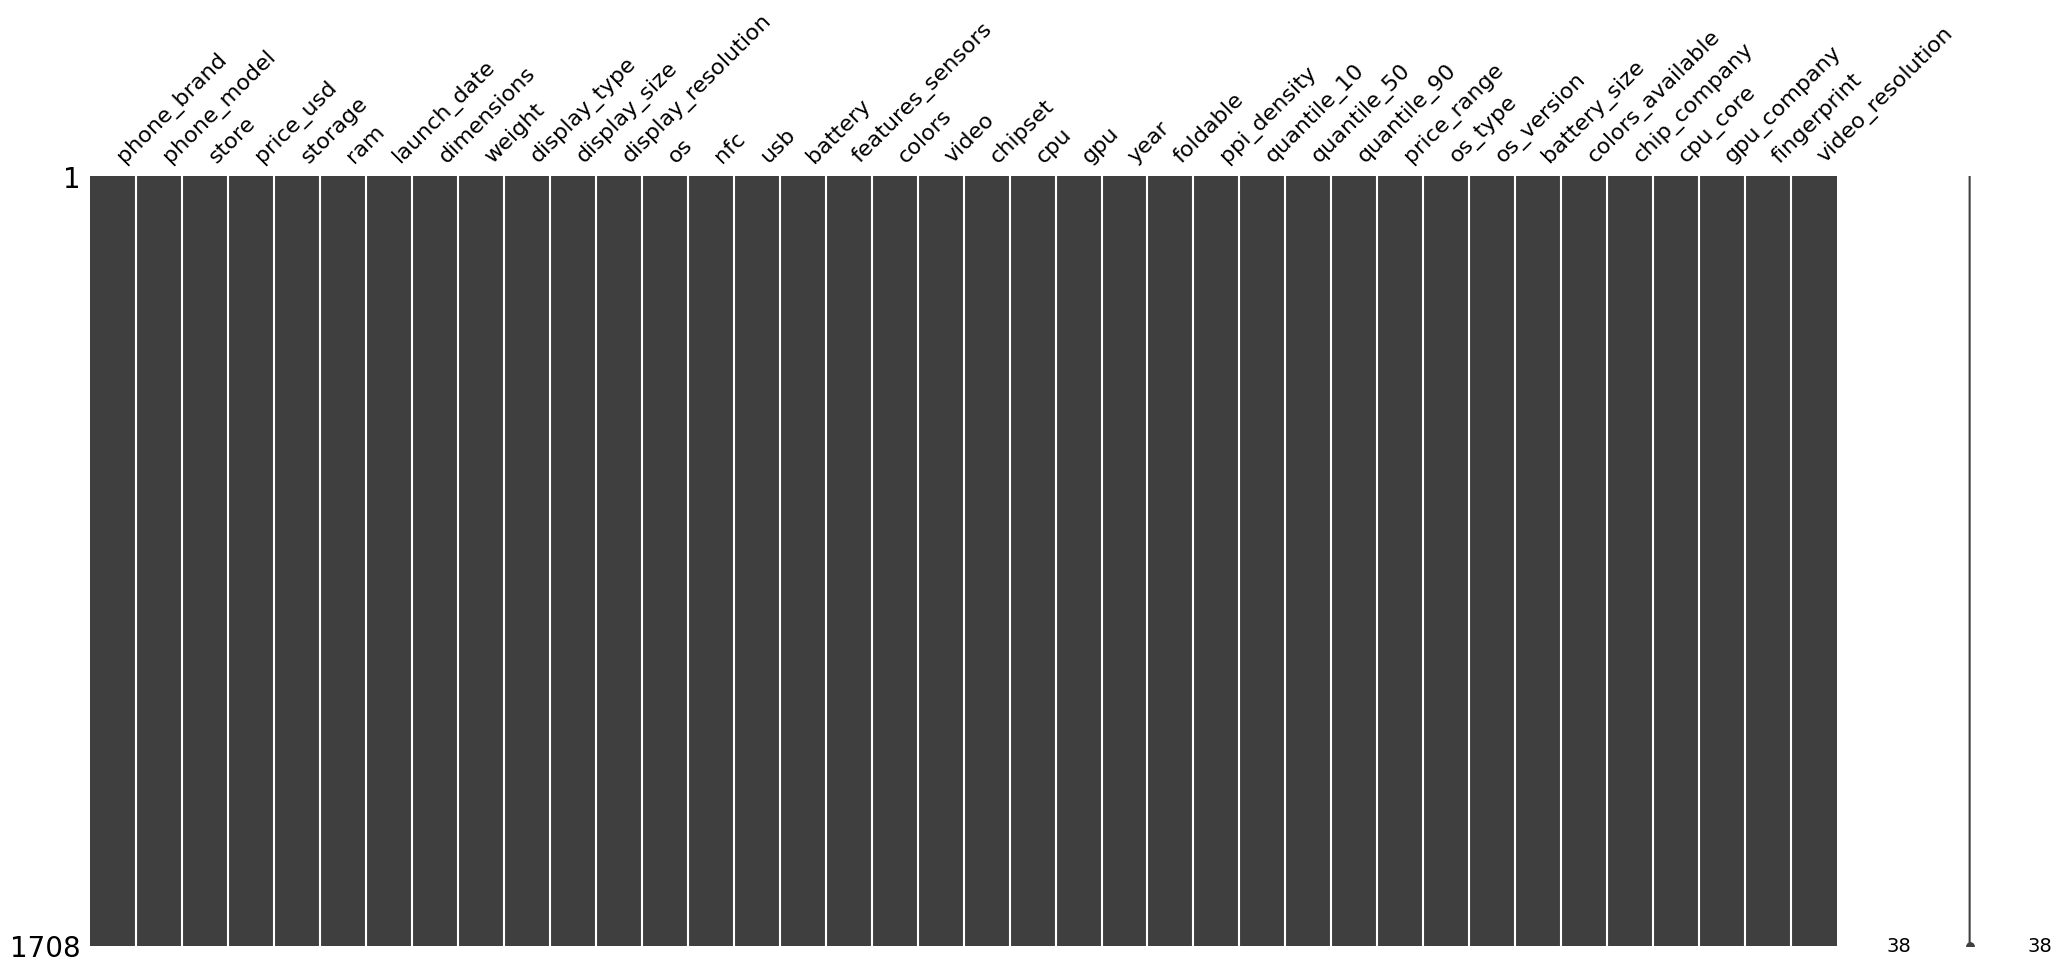

In [60]:
msno.matrix(dfc)

In [61]:
df.columns

Index(['phone_brand', 'phone_model', 'store', 'price', 'currency', 'price_USD',
       'storage', 'ram', 'Launch', 'Dimensions', 'Weight', 'Display_Type',
       'Display_Size', 'Display_Resolution', 'OS', 'NFC', 'USB', 'BATTERY',
       'Features_Sensors', 'Colors', 'Video', 'Chipset', 'CPU', 'GPU', 'Year',
       'Foldable', 'PPI_Density', 'quantile_10', 'quantile_50', 'quantile_90',
       'price_range'],
      dtype='object')

<div style="font-family: Arial, sans-serif; font-size: 20px; text-align: center; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;"> ⭐ Analysis is never ending we can more refine this dataset to get more in-depth insights from this data. ⭐
</div>